## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Kelvin Waters
# Online FT 01/21/20 cohort
# Once submitted
# Abhineet Kulkarni

### Best practice to import all the necessary files up top ###

In [233]:
from importlib import reload

import sqlite3
import calendar
import pandas as pd
import numpy as np
import helper_functions as hf

import matplotlib.pyplot as plt
%matplotlib inline

import squarify
import seaborn as sns
sns.set(style= 'ticks', color_codes= True)

### This line will preload the helper_functions.py (table_list, load_table, and convert_dollars_to_int) within this notebook directory ###

In [234]:
# can't mask this from displaying desktop dir information
reload(hf)

<module 'helper_functions' from 'C:\\Users\\kelvi\\flatiron\\section01\\dsc-mod-1-project-v2-1-online-ds-ft-120919\\helper_functions.py'>

### Preview tables with a .head(2) to preview table data, and the avaiable columns ###

In [235]:
# head(2) is preferable the default (5) is too large and you'd have to scroll between the datasets which I will have to
# perform during the EDA phase anyway

def preview_tables(conn, tables='all'):
    all_tables = hf.get_table_list(conn)
    if tables=='all':
        final_table_names = all_tables
        
    elif type(tables) == list:
        final_table_names = [t for t in all_tables if t in tables]
    
    for table_name in final_table_names:
        print(f"Showing Table: {table_name}")
        query = f"select * from {table_name};"
        df = pd.read_sql(query, conn)
        display(df.head(2))
        print("-"*100)
    print("finished")
    return None

In [236]:
# sqlite connection
conn = sqlite3.Connection("movies_db.sqlite")
c = conn.cursor()

In [237]:
# loads all tables 
table_names = hf.get_table_list(conn)
table_names

['bom_movie_gross',
 'name_basics',
 'title_akas',
 'title_basics',
 'title_crew',
 'title_principals',
 'title_ratings',
 'tmdb_movies',
 'tn_movie_budgets']

In [238]:
# again preview tables set to head(2) for a quick glance at some data and define the cols
preview_tables(conn, tables= 'all')

Showing Table: bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


----------------------------------------------------------------------------------------------------
Showing Table: name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


----------------------------------------------------------------------------------------------------
Showing Table: title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0


----------------------------------------------------------------------------------------------------
Showing Table: title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


----------------------------------------------------------------------------------------------------
Showing Table: title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"


----------------------------------------------------------------------------------------------------
Showing Table: title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None


----------------------------------------------------------------------------------------------------
Showing Table: title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


----------------------------------------------------------------------------------------------------
Showing Table: tmdb_movies


,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


----------------------------------------------------------------------------------------------------
Showing Table: tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


----------------------------------------------------------------------------------------------------
finished


### <u>Scenario</u>: Microsoft is interested in the film industry and wants to know what types of movies provide the most bang for the production buck at the box office. 

### I will determine which studios are productive based on a number of factors and gather what specific types of movies are driving their subsequent success. 

### From the following table data: 

1. **bom_movie_gross:** 
     title, studio, domestic_gross, foreign_gross, year
    
2. **tn_movie_budgets:**
    id, release_date, movie, production_budget, domestic_gross, worldwide_gross
    
1. **tmdb_movies:**
     index, genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count
    
1. **title_ratings:**
     tconst, averagerating, numvotes
    
1. **title_basics:**
     tconst,	primary_title, original_title, start_year, runtime_minutes, genres
     
### I will attempt to answer these Questions? ###
1. Who are the top studio's in the industry?
2. What genres are most productive at the box office?
3. What other factors are in a studio's aresenal to generate revenue?

### EDA on the various tables###

### bom_movie_gross table###

#### df.head() ###

In [8]:
# initial table data
# df rolling naming convention being adapted
bom_movie_gross = hf.load_table(conn, "bom_movie_gross")
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### df.shape() ###

In [9]:
# ascertain the initial shape of the data before altering anything! 
bom_movie_gross.shape

(3387, 5)

#### df.info() ####

In [10]:
# basic table info 
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### df.isna() ####

In [11]:
# chainning methods to obtain the percentage of missing data
# foreign_gross has almost 40% missing NOT planning on using this column
# since there is a worldwide_gross series(cols) on another table
bom_movie_gross.isna().mean().round(4)* 100

title              0.00
studio             0.15
domestic_gross     0.83
foreign_gross     39.86
year               0.00
dtype: float64

#### df.groupby() to determine studio values ####

In [12]:
# studio count
# it's obvious some studio's are making a lot of films
# I wonder if that automatically correalates into positive numbers
bom_movie_gross.groupby('studio')['studio'].agg('count')

studio
3D        1
A23       2
A24      49
ADC       2
AF        6
         ..
XL        2
YFG       1
Yash     14
Zee       1
Zeit.    16
Name: studio, Length: 257, dtype: int64

#### df.dropna() ####
#### this drop would result in a significant loss of data, namely 1380 rows! ####

In [13]:
# dropping NaN's from domestic_gross and the 5 missing studio values
# bom_movie_gross = bm.dropna()

#### df.drop() ####

In [14]:
# dropping foreign gross from table > 30% NaN
# bom_movie_gross = bom_movie_gross.drop(['foreign_gross'], axis='columns')

#### going to have to ignore the foreign_gross series/cols and retain the 1300+ rows of data! ####

In [15]:
# imperative to always verify the shape of the data with every preposed change
bom_movie_gross.shape

(3387, 5)

In [16]:
# from this table alone, I am able to determine the top production studio's based
# on the domestic_growth col. Once this table is joined with the worldwide_gross and 
# production_costs are calculated this list may change. 
df = bom_movie_gross.groupby('studio')['domestic_gross'].agg('sum').sort_values(ascending= False)
df.head()

studio
BV      1.841903e+10
Uni.    1.290239e+10
WB      1.216805e+10
Fox     1.094950e+10
Sony    8.459683e+09
Name: domestic_gross, dtype: float64

### tmdb_movies table ###

####  df.head() ####

In [17]:
# initial table data, noting the cols/series I can utilize for my analysis
# I may need to strip and or tally these genre_ids with the title 
# or find some other source for the genre_ids values
tmdb_movies = hf.load_table(conn, "tmdb_movies")
tmdb_movies.head()

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### df.shape() ####

In [18]:
# initial shape before messing things up
tmdb_movies.shape

(26517, 10)

#### df.info() ####

In [19]:
# table info, taking note of the dtypes 
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
index                26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### df.isna() ####

In [20]:
# no missing data from this table!
tmdb_movies.isna().mean().round(4)* 100

index                0.0
genre_ids            0.0
id                   0.0
original_language    0.0
original_title       0.0
popularity           0.0
release_date         0.0
title                0.0
vote_average         0.0
vote_count           0.0
dtype: float64

### tn_movie_budgets table ###

In [21]:
# load table
tn_movie_budgets = hf.load_table(conn, "tn_movie_budgets")

#### This code changes these str monetary values into int64 nummerical datatype via astype in the helper_function.py within the dir of this notebook####

In [22]:
# helper functions to change these datatypes from str monetary values to int64
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    tn_movie_budgets = hf.convert_dollars_to_int(tn_movie_budgets, col)

#### df.head() ####

In [23]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


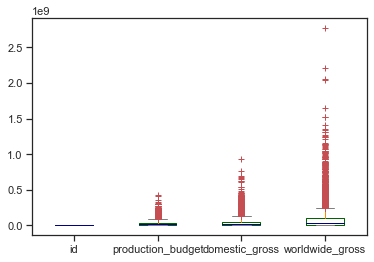

In [24]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
tn_movie_budgets.plot.box(color=color, sym='r+')

#### df.shape() ####

In [25]:
# initial shape before muking around
tn_movie_budgets.shape

(5782, 6)

#### df.info() ####

In [26]:
# release_date and movie are type object
# production_budget, domestic_gross, and worldwide_gross has been successfully converted to int64 numerical type
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


#### df.isna() ####

In [27]:
# this table isn't missing any data as well! 
# chainging methods
tn_movie_budgets.isna().mean().round(4)* 100

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

In [28]:
# adding a new col/series with the net gross ie profit
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] + tn_movie_budgets['domestic_gross'] - tn_movie_budgets['production_budget']

#### df.head() ###

In [29]:
# df head has been altered to include a new series = profit
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


In [30]:
tn_movie_budgets.worldwide_gross.describe()

count    5.782000e+03
mean     9.148746e+07
std      1.747200e+08
min      0.000000e+00
25%      4.125415e+06
50%      2.798445e+07
75%      9.764584e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64

In [31]:
tn_movie_budgets.rename(columns={'movie':'title'}, inplace=True)

### title_basics table ###

#### df.head() ####

In [32]:
# load table
title_basics = hf.load_table(conn, "title_basics")
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### df.shape() ####

In [33]:
# initial shape of the data
title_basics.shape

(146144, 6)

#### df.info() ####

In [34]:
# basic table info
# taking note of the datatypes
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


#### df.isna() ####

In [35]:
# runtime_minutes is missing nearly 22% data
# genres are missing 4% very workable
# chaining methods for better results
title_basics.isna().mean().round(4)* 100

tconst              0.00
primary_title       0.00
original_title      0.01
start_year          0.00
runtime_minutes    21.72
genres              3.70
dtype: float64

In [36]:
title_basics.rename(columns= {'primary_title':'title'}, inplace= True)

#### genres col/series is a bit of a problem with multiple values, here I am splitting up the series and will concat these values later ###

In [37]:
# a single movie can be both an action, crime, and a drama!
title_basics_split = title_basics.genres.str.split(pat= ",", n=-1, expand=True)
title_basics_split

,0,1,2
0,Action,Crime,Drama
1,Biography,Drama,None
2,Drama,None,None
3,Comedy,Drama,None
4,Comedy,Drama,Fantasy
...,...,...,...
146139,Drama,None,None
146140,Documentary,None,None
146141,Comedy,None,None
146142,None,None,None


#### successfully concatenated the values back into the dataframe, at this point I could remove the genres series/col ####

In [38]:
# now I'll have to figure out a way to tally genres per movie title once I join the studio values 
# to this table
title_basics_concat = pd.concat([title_basics, title_basics_split], axis = 1)
title_basics_concat

,tconst,title,original_title,start_year,runtime_minutes,genres,0,1,2
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,Drama,None,None
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Documentary,None,None
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Comedy,None,None
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,None,None,None


### title_ratings table###

#### df.head() ####

In [39]:
# load the table
title_ratings = hf.load_table(conn, "title_ratings")
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### df.shape() ####

In [40]:
# initial shape
title_ratings.shape

(73856, 3)

#### df.info() ####

In [41]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### df.isna() ####

In [42]:
# no missing data from this table
title_ratings.isna().mean().round(4)* 100

tconst           0.0
averagerating    0.0
numvotes         0.0
dtype: float64

#### let's rename averagerating series to average_rating that way it'll match the other naming conventions ####

In [43]:
# renaming col
title_ratings.rename(columns={'averagerating': 'average_rating'}, inplace= True)

In [44]:
# taking another look at the df head
title_ratings.head()

,tconst,average_rating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [45]:
title_ratings.average_rating.describe()

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: average_rating, dtype: float64

### name_basics table ###

#### df.head() ####

In [46]:
# load the table data
name_basics = hf.load_table(conn, "name_basics")
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


#### name_basics 'known_for_titles' col has indentical values as tconst on subsequesnt table, hence the rename ####

In [47]:
# renaming known_for_titles as tconst
# now I have to link these tconst values to the appropriate studio and movie title
name_basics.rename(columns={'known_for_titles': 'tconst'}, inplace=True)

In [48]:
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,tconst
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


#### df.shape() ####

In [49]:
# initial table size
name_basics.shape

(606648, 6)

##### df.info() ####

In [50]:
# table info some missing data
# notice data types
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
tconst                576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


#### df.isna() ####

In [51]:
# birth_year more than 86% missing 
# death_year more than 98% missing 
name_basics.isna().mean().round(4)* 100

nconst                 0.00
primary_name           0.00
birth_year            86.36
death_year            98.88
primary_profession     8.46
tconst                 4.98
dtype: float64

In [52]:
# split primary_professon cols into mulitple cols in order 
# to deal with numerous values on a row
name_basics_split = name_basics.primary_profession.str.split(pat= ",", n=-1, expand=True)
name_basics_split

,0,1,2
0,miscellaneous,production_manager,producer
1,composer,music_department,sound_department
2,miscellaneous,actor,writer
3,camera_department,cinematographer,art_department
4,production_designer,art_department,set_decorator
...,...,...,...
606643,actress,None,None
606644,actress,None,None
606645,actress,None,None
606646,producer,None,None


#### concat nb, nb1 trying to deal with multiple values in a row ####

In [53]:
# succcessfully concatenated the df can remove the primary_profession col at this point
# may rename one or more of the other cols not sure which entry would be considered the 
# primary profession
name_basics_concat = pd.concat([name_basics, name_basics_split], axis = 1)
name_basics_concat

,nconst,primary_name,birth_year,death_year,primary_profession,tconst,0,1,2
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",miscellaneous,production_manager,producer
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",composer,music_department,sound_department
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898",miscellaneous,actor,writer
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387",camera_department,cinematographer,art_department
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256",production_designer,art_department,set_decorator
...,...,...,...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,None,actress,None,None
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130",actress,None,None
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610",actress,None,None
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,None,producer,None,None


#### df.head() ####

In [54]:
# taking another look at the df
name_basics_concat.head()

,nconst,primary_name,birth_year,death_year,primary_profession,tconst,0,1,2
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",miscellaneous,production_manager,producer
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",composer,music_department,sound_department
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898",miscellaneous,actor,writer
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387",camera_department,cinematographer,art_department
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256",production_designer,art_department,set_decorator


#### new approach to pulling out director data ####

In [55]:
# # can actually search the primary_profession series for 'director'
# # this may be a better approach
# # name_basics known_for_titles (rename to tconst) col looks familiar to tconst tt values on title_basics join on tconst, 
# # change title_basics primary_title to just title then join bom_tn_movie_merge on title, that way I can tie directors to studios to films
# directors = name_basics.primary_profession.isin(['director'])
# name_basics[directors]

In [56]:
# change of plans, just use sql on name_basics table WHERE primary_profession = 'director'
# name_basics_dir = name_basics[directors]
# name_basics_dir

### title_akas table ###

In [57]:
# load table
title_akas = hf.load_table(conn, "title_akas")
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


#### df.shape() ####

In [58]:
# initial table size
title_akas.shape

(331703, 8)

#### df.info() ####

In [59]:
# taking note of dtypes and cols
# title_id data is the same as tconst values on other tables
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


#### df.isna() ####

In [60]:
# title_id (tconst) looks viable 
# is_original_title could ad some demensions to a question
# languge, types, and attributes are missing > 30% these values aren't being considered
title_akas.isna().mean().round(4)* 100

title_id              0.00
ordering              0.00
title                 0.00
region               16.07
language             87.42
types                49.22
attributes           95.50
is_original_title     0.01
dtype: float64

In [61]:
# duplicates! 
title_akas.title_id.head()

0    tt0369610
1    tt0369610
2    tt0369610
3    tt0369610
4    tt0369610
Name: title_id, dtype: object

#### df.duplicated() ####

In [62]:
title_akas.duplicated(['title_id','title'], keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
331698     True
331699    False
331700    False
331701     True
331702    False
Length: 331703, dtype: bool

#### df.drop_duplicates() ####

In [63]:
title_akas.drop_duplicates(['title_id', 'title'], keep='first', inplace=True)

#### df.shape() ####

In [64]:
title_akas.shape

(266869, 8)

In [65]:
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


#### title_id and tconst values are identical values it seems ####

In [66]:
# renaming for merging purposes
title_akas.rename(columns={'title_id': 'tconst'}, inplace=True)
title_akas

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331695,tt9755806,2,Большая Акула,RU,None,None,None,0.0
331697,tt9827784,1,Sayonara kuchibiru,JP,None,None,None,0.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0


### title_crew table ###

In [67]:
# this table is useless!
# where are these values stored so I can cross ref'em?
title_crew = hf.load_table(conn, "title_crew")
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


#### this merge ought to answer which studio is most productive using simple calculations of the sum of domestic_gross, and worldwide_gross - production_budget ####

In [68]:
# question 1 answer
bom_tn_movie_merge = pd.merge(bom_movie_gross, tn_movie_budgets, on= 'title')
bom_tn_movie_merge

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,profit
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",200000000,415004880,1068879522,1283884402
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",160000000,292576195,835524642,968100837
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",165000000,238736787,756244673,829981460
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",68000000,300531751,706102828,938634579
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",170000000,312433331,621156389,763589720
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,None,2018,64,"Jun 15, 2018",10000000,4286367,6089100,375467
1243,Ben is Back,RAtt.,3700000.0,None,2018,95,"Dec 7, 2018",13000000,3703182,9633111,336293
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",30000000,490973,648599,-28860428
1245,Mandy,RLJ,1200000.0,None,2018,71,"Sep 14, 2018",6000000,1214525,1427656,-3357819


In [69]:
# title_basics_genres = title_basics_concat.drop(['genres'], axis='columns')
# title_basics_genres

In [70]:
# # renaming primary_title to title for convience and possible merge
# # merging on non-numerical values isn't ideal. 
# title_basics_genres.rename(columns={'primary_title':'title'}, inplace=True)

In [71]:
# title_basics_genres

In [72]:
table_names

['bom_movie_gross',
 'name_basics',
 'title_akas',
 'title_basics',
 'title_crew',
 'title_principals',
 'title_ratings',
 'tmdb_movies',
 'tn_movie_budgets']

#### merging name_basics title_principals via sql ####

In [73]:
query = """SELECT primary_name, 
            primary_profession, 
            known_for_titles, 
            tconst
            FROM name_basics 
            JOIN title_principals
            USING (nconst)
            WHERE primary_profession = 'director'
            """
name_basics_title_principals = pd.read_sql(query, conn)
name_basics_title_principals.head()

,primary_name,primary_profession,known_for_titles,tconst
0,Kyle Lollis,director,None,tt10122042
1,Verma Vivek,director,tt1451707,tt10133066
2,Inayat Shaikh,director,None,tt10163206
3,Shakir Shaikh,director,None,tt10163206
4,James Snider,director,"tt10187780,tt9306714,tt8850510,tt9465532",tt10187822


In [74]:
name_basics_title_principals.shape

(10023, 4)

#### joining tables title_basics title_ratings through sql query ####

In [75]:
query = """SELECT original_title, 
        start_year,
        runtime_minutes,
        genres,
        numvotes,
        averagerating,
        tconst
        FROM title_basics
        JOIN title_ratings
        USING (tconst)
        """
title_basics_title_ratings = pd.read_sql(query, conn)
title_basics_title_ratings

,original_title,start_year,runtime_minutes,genres,numvotes,averagerating,tconst
0,Sunghursh,2013,175.0,"Action,Crime,Drama",77,7.0,tt0063540
1,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",43,7.2,tt0066787
2,The Other Side of the Wind,2018,122.0,Drama,4517,6.9,tt0069049
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",13,6.1,tt0069204
4,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",119,6.5,tt0100275
...,...,...,...,...,...,...,...
73851,Diabolik sono io,2019,75.0,Documentary,6,6.2,tt9913084
73852,Sokagin Çocuklari,2019,98.0,"Drama,Family",136,8.7,tt9914286
73853,Albatross,2017,NaN,Documentary,8,8.5,tt9914642
73854,La vida sense la Sara Amat,2019,NaN,None,5,6.6,tt9914942


In [76]:
dir_name_genre = pd.merge(name_basics_title_principals,title_basics_title_ratings, on= 'tconst' )
dir_name_genre.head(2)

,primary_name,primary_profession,known_for_titles,tconst,original_title,start_year,runtime_minutes,genres,numvotes,averagerating
0,Kyle Lollis,director,None,tt10122042,Kingdom Men Rising,2019,93.0,Documentary,30,8.0
1,Kazuaki Ue,director,tt1606197,tt1606197,Dârin wa gaikokujin,2010,100.0,Comedy,429,6.1


In [132]:
dir_name_genre.columns

Index(['primary_name', 'primary_profession', 'known_for_titles', 'tconst',
       'original_title', 'start_year', 'runtime_minutes', 'genres', 'numvotes',
       'averagerating'],
      dtype='object')

In [172]:
dir_name_genre.groupby(['primary_name', 'original_title']).runtime_minutes.mean()

primary_name    original_title                                                  
A. Joji         Oru Caribbean Udayippu                                              131.0
A. Liong Wong   13 cara memanggil setan                                              80.0
A.N. Other      Julian Assange: A Modern Day Hero? Inside the World of Wikileaks    114.0
A.R. Rajasekar  Uyire.. Uyire..                                                       NaN
A.V. Sasidaran  Olipporu                                                            109.0
                                                                                    ...  
Éric Nadler     Armes Chimiques Sous La Mer                                           NaN
Özer Kiziltan   Askin 5 Hali                                                          NaN
                Beni Unutma                                                         100.0
                Mahrumlar                                                           121.0
Özlem Kayhan    3 v

In [164]:
avg = dir_name_genre.averagerating.value_counts(normalize=True)

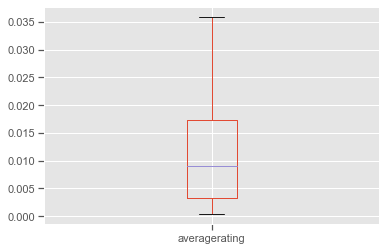

In [166]:
avg.plot.box()

In [195]:
# release date is an object! 
bom_tn_movie_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 11 columns):
title                1247 non-null object
studio               1246 non-null object
domestic_gross_x     1245 non-null float64
foreign_gross        1086 non-null object
year                 1247 non-null int64
id                   1247 non-null int64
release_date         1247 non-null object
production_budget    1247 non-null int64
domestic_gross_y     1247 non-null int64
worldwide_gross      1247 non-null int64
profit               1247 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 156.9+ KB


In [199]:
# changing release_date to a datetime obj
bom_tn_movie_merge['release_date'] = pd.to_datetime(bom_tn_movie_merge['release_date'])

In [202]:
# confirm that release_date is now a datetime obj
bom_tn_movie_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 11 columns):
title                1247 non-null object
studio               1246 non-null object
domestic_gross_x     1245 non-null float64
foreign_gross        1086 non-null object
year                 1247 non-null int64
id                   1247 non-null int64
release_date         1247 non-null datetime64[ns]
production_budget    1247 non-null int64
domestic_gross_y     1247 non-null int64
worldwide_gross      1247 non-null int64
profit               1247 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 156.9+ KB


#### abandoned trying to bridge this data with the name_basics table for movie director question, have a use for this data afterall ####

In [212]:
# released month added to the table
bom_tn_movie_merge.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'release_date', 'production_budget', 'domestic_gross_y',
       'worldwide_gross', 'profit', 'release_month'],
      dtype='object')

In [213]:
bom_tn_movie_merge['release_month'] = bom_tn_movie_merge['release_date'].map(lambda x : x.month)

In [244]:
# TypeError: list indices must be integers or slices, not str
# but it still works?! 
bom_tn_movie_merge['release_month'] = bom_tn_movie_merge['release_month'].apply(lambda x : calendar.month_abbr[x])

TypeError: list indices must be integers or slices, not str

In [245]:
# good workable shape 1247 rows
bom_tn_movie_merge.shape

(1247, 12)

#### Is there a good time to release a movie? ####

In [246]:
# Jun, Nov, July, Dec, and May are the best times to release a new film!
best_time_to_release = bom_tn_movie_merge.groupby('release_month')['profit'].agg('sum').sort_values(ascending=False)

In [247]:
# Now to change numerical month to str month abbreviation
best_time_to_release

release_month
Jun    30425085643
Nov    26538590451
Jul    25852570780
Dec    23649060864
May    21079955970
Mar    13574124932
Apr    13201753763
Feb    13136353718
Aug    11339542316
Oct    11090898342
Sep     9487346736
Jan     7290541068
Name: profit, dtype: int64

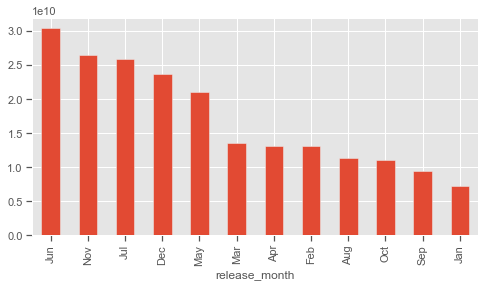

In [258]:
best_time_to_release.plot.bar(figsize=(8,4))

#### pie chart with the correct percentages that add up to 100% ####

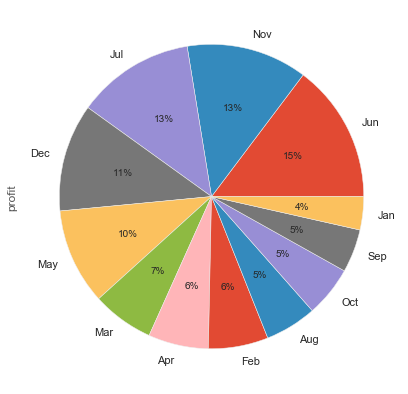

In [260]:
best_time_to_release.plot.pie(figsize=(15,7), autopct='%1.0f%%', pctdistance=.6)

In [82]:
# using these two table to combine studio and genres values
title_basics.columns

Index(['tconst', 'title', 'original_title', 'start_year', 'runtime_minutes',
       'genres'],
      dtype='object')

In [83]:
# 2 using these two tables to combine studio and genre values
bom_movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [84]:
query = """SELECT primary_title,
        start_year,
        runtime_minutes,
        genres,
        studio,
        domestic_gross
        FROM title_basics
        JOIN bom_movie_gross
        ON (title)
"""
studio_genres = pd.read_sql(query, conn)
studio_genres.head(2)

,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross
0,Sunghursh,2013,175.0,"Action,Crime,Drama",FoxS,18300000.0
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",FoxS,18300000.0


In [85]:
df = studio_genres.groupby(['studio'])[['genres']]

In [86]:
count = 0

for i in studio_genres.genres:
    if i == 'Action':
        count = count + 1
print("Count of Action in studio_genres is: " + str(count))

Count of Action in studio_genres is: 124264


In [87]:
word_counts = {}

for word in studio_genres.genres:
    word_counts[word] = word_counts.get(word, 0) + 1
print(word_counts)

{'Action,Crime,Drama': 40712, 'Biography,Drama': 16744, 'Drama': 1203216, 'Comedy,Drama': 197064, 'Comedy,Drama,Fantasy': 12376, 'Comedy': 513912, 'Horror,Thriller': 70168, 'Adventure,Animation,Comedy': 15680, 'Documentary,History': 72184, 'Biography': 28560, 'History': 23184, 'Documentary': 1802360, 'Animation,Drama,History': 280, None: 302848, 'Drama,Mystery': 17864, 'Action,Animation,Comedy': 2800, 'Crime,Drama': 40488, 'Biography,Comedy,Drama': 5320, 'Action,Drama': 30072, 'Sci-Fi': 39872, 'Thriller': 170576, 'Action,Adventure,Fantasy': 7952, 'Drama,Romance': 116424, 'Adventure,Animation,Sci-Fi': 728, 'Drama,Horror': 13664, 'Drama,Mystery,Thriller': 24528, 'Drama,Family': 43904, 'Adventure,Comedy,Romance': 1792, 'Adventure,Drama,Romance': 3640, 'Comedy,Crime,Drama': 17640, 'Horror': 244832, 'Adventure,Comedy,Drama': 11872, 'Drama,Sci-Fi,Thriller': 6496, 'Action': 124264, 'Comedy,Drama,Romance': 87248, 'Action,Adventure,Sci-Fi': 8512, 'Crime,Drama,Thriller': 37240, 'Comedy,Family': 

In [88]:
word_counts = {}

for word in title_basics_split:
    word_counts[word] = word_counts.get(word, 0) + 1

print(word_counts)

{0: 1, 1: 1, 2: 1}


In [89]:
title_basics_split.head(25)

,0,1,2
0,Action,Crime,Drama
1,Biography,Drama,None
2,Drama,None,None
3,Comedy,Drama,None
4,Comedy,Drama,Fantasy
5,Comedy,None,None
6,Horror,Thriller,None
7,Adventure,Animation,Comedy
8,Documentary,History,None
9,Biography,None,None


#### What are the Top 5 movie studios? ####

In [90]:
# Top five studios based on net gross
Top_5_studio = bom_tn_movie_merge.head().groupby('studio')['profit'].agg('sum').sort_values(ascending= False)
Top_5_studio

studio
BV      1283884402
WB       968100837
Sum.     938634579
P/DW     829981460
Par.     763589720
Name: profit, dtype: int64

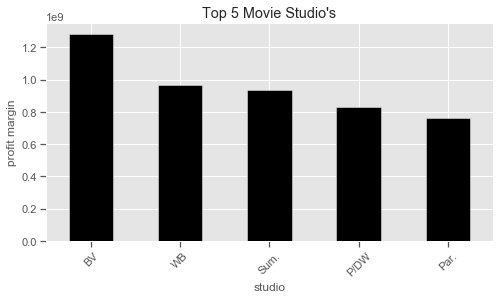

In [261]:
# top five studios
Top_5_studio.plot.bar(figsize=(8,4), color= 'black')
plt.title("Top 5 Movie Studio's")
plt.xlabel('studio')
plt.xticks(rotation = 45)
plt.ylabel('profit margin')
plt.style.use('ggplot')

#### pic charts are frowned upon cause without the percentage values it can hide the true distributions in each slice, all values must equal to 100% ####

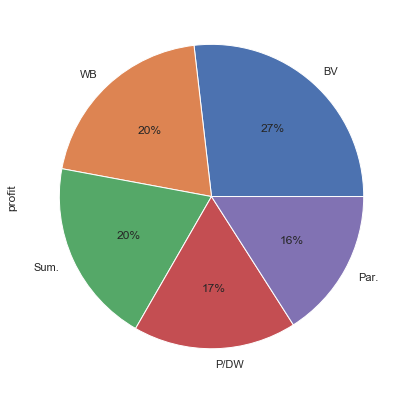

In [253]:
# gratuitous pie chart of the top 5 movie studios
Top_5_studio.plot.pie(figsize=(15,7), autopct='%1.0f%%', pctdistance=.6)

In [93]:
bom_tn_movie_merge.pivot_table(index='studio', margins= True)

,domestic_gross_x,domestic_gross_y,id,production_budget,profit,worldwide_gross,year
studio,,,,,,,
3D,6.100000e+06,6.096582e+06,31.000000,5.000000e+06,1.761178e+07,1.651520e+07,2010.000000
A24,1.141252e+07,1.141401e+07,48.095238,6.814286e+06,2.364760e+07,1.904788e+07,2015.523810
ALP,2.800000e+03,4.247200e+04,52.000000,2.600000e+07,-2.303357e+07,2.923959e+06,2011.000000
ATO,1.000000e+06,2.039869e+06,32.000000,1.250000e+07,-8.187945e+06,2.272186e+06,2010.000000
Affirm,1.170000e+07,1.167510e+07,53.500000,3.500000e+06,2.391085e+07,1.573575e+07,2017.500000
...,...,...,...,...,...,...,...
WB (NL),9.237027e+07,9.236838e+07,48.513514,5.807027e+07,2.651323e+08,2.308342e+08,2014.162162
WHE,3.830000e+05,3.829460e+05,54.000000,7.000000e+06,-6.234108e+06,3.829460e+05,2011.000000
Wein.,3.117979e+07,3.117447e+07,48.268293,2.043902e+07,7.951573e+07,6.878029e+07,2013.341463


In [94]:
# all the studios in a list obj
bom_tn_movie_merge.studio.unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Sony', 'FoxS',
       'SGem', 'WB (NL)', 'LGF', 'MBox', 'W/Dim.', 'Focus', 'MGM',
       'Over.', 'Mira.', 'NM', 'CBS', 'SPC', 'ParV', 'Gold.', 'RAtt.',
       'Magn.', 'IFC', 'Free', '3D', 'Wein.', 'Rela.', 'Anch.', 'App.',
       'Drft.', 'IW', 'Relbig.', 'Viv.', 'Eros', 'Scre.', 'UTV', 'Kino',
       'ATO', 'First', 'GK', 'NFC', 'Strand', 'Mont.', 'IVP', 'FD',
       'TriS', 'ORF', 'Jan.', 'Osci.', 'OMNI/FSR', None, 'SMod', 'WHE',
       'P4', 'ALP', 'LG/S', 'RTWC', 'MNE', 'LD', 'Yash', 'IM', 'A24',
       'PH', 'EOne', 'ELS', 'CE', 'Saban', 'DR', 'Trib.', 'KE', 'VE',
       'EC', 'BG', 'PFR', 'BST', 'BH Tilt', 'BSC', 'FCW', 'Cohen', 'LGP',
       'TFA', 'Alc', 'STX', 'Orch.', 'PNT', 'CJ', 'Cleopatra', 'BBC',
       'GrtIndia', 'Neon', 'Affirm', 'ENTMP', 'Studio 8', 'Annapurna',
       'Global Road', 'Amazon', 'RLJ'], dtype=object)

In [95]:
# grouping by studio
g = bom_tn_movie_merge.groupby('studio')
g

In [96]:
# looping through all the studios and separating their data
# not very readable
for studio, studio in g:
    print(studio)
    print(bom_tn_movie_merge)

                                          title studio  domestic_gross_x  \
118  Sea Rex 3D: Journey to a Prehistoric World     3D         6100000.0   

    foreign_gross  year  id  release_date  production_budget  \
118       9900000  2010  31  May 28, 2010            5000000   

     domestic_gross_y  worldwide_gross    profit  
118           6096582         16515203  17611785  
                           title studio  domestic_gross_x foreign_gross  year  \
0                    Toy Story 3     BV       415000000.0     652000000  2010   
1                      Inception     WB       292600000.0     535700000  2010   
2            Shrek Forever After   P/DW       238700000.0     513900000  2010   
3     The Twilight Saga: Eclipse   Sum.       300500000.0     398000000  2010   
4                     Iron Man 2   Par.       312400000.0     311500000  2010   
...                          ...    ...               ...           ...   ...   
1242                       Gotti     VE         4

1045  37519252  
                           title studio  domestic_gross_x foreign_gross  year  \
0                    Toy Story 3     BV       415000000.0     652000000  2010   
1                      Inception     WB       292600000.0     535700000  2010   
2            Shrek Forever After   P/DW       238700000.0     513900000  2010   
3     The Twilight Saga: Eclipse   Sum.       300500000.0     398000000  2010   
4                     Iron Man 2   Par.       312400000.0     311500000  2010   
...                          ...    ...               ...           ...   ...   
1242                       Gotti     VE         4300000.0          None  2018   
1243                 Ben is Back  RAtt.         3700000.0          None  2018   
1244  Bilal: A New Breed of Hero     VE          491000.0       1700000  2018   
1245                       Mandy    RLJ         1200000.0          None  2018   
1246                Lean on Pete    A24         1200000.0          None  2018   

       id 

757  -4376780  
                           title studio  domestic_gross_x foreign_gross  year  \
0                    Toy Story 3     BV       415000000.0     652000000  2010   
1                      Inception     WB       292600000.0     535700000  2010   
2            Shrek Forever After   P/DW       238700000.0     513900000  2010   
3     The Twilight Saga: Eclipse   Sum.       300500000.0     398000000  2010   
4                     Iron Man 2   Par.       312400000.0     311500000  2010   
...                          ...    ...               ...           ...   ...   
1242                       Gotti     VE         4300000.0          None  2018   
1243                 Ben is Back  RAtt.         3700000.0          None  2018   
1244  Bilal: A New Breed of Hero     VE          491000.0       1700000  2018   
1245                       Mandy    RLJ         1200000.0          None  2018   
1246                Lean on Pete    A24         1200000.0          None  2018   

       id  

[1247 rows x 11 columns]
                       title studio  domestic_gross_x foreign_gross  year  id  \
183  Saint John of Las Vegas    IVP          103000.0          9100  2010  55   

     release_date  production_budget  domestic_gross_y  worldwide_gross  \
183  Jan 29, 2010            2000000            102645           102645   

      profit  
183 -1794710  
                           title studio  domestic_gross_x foreign_gross  year  \
0                    Toy Story 3     BV       415000000.0     652000000  2010   
1                      Inception     WB       292600000.0     535700000  2010   
2            Shrek Forever After   P/DW       238700000.0     513900000  2010   
3     The Twilight Saga: Eclipse   Sum.       300500000.0     398000000  2010   
4                     Iron Man 2   Par.       312400000.0     311500000  2010   
...                          ...    ...               ...           ...   ...   
1242                       Gotti     VE         4300000.0       

171 -1771705  
                           title studio  domestic_gross_x foreign_gross  year  \
0                    Toy Story 3     BV       415000000.0     652000000  2010   
1                      Inception     WB       292600000.0     535700000  2010   
2            Shrek Forever After   P/DW       238700000.0     513900000  2010   
3     The Twilight Saga: Eclipse   Sum.       300500000.0     398000000  2010   
4                     Iron Man 2   Par.       312400000.0     311500000  2010   
...                          ...    ...               ...           ...   ...   
1242                       Gotti     VE         4300000.0          None  2018   
1243                 Ben is Back  RAtt.         3700000.0          None  2018   
1244  Bilal: A New Breed of Hero     VE          491000.0       1700000  2018   
1245                       Mandy    RLJ         1200000.0          None  2018   
1246                Lean on Pete    A24         1200000.0          None  2018   

       id  r

[1247 rows x 11 columns]
                         title studio  domestic_gross_x foreign_gross  year  \
126          The Warrior's Way  Rela.         5700000.0       5400000  2010   
205                  Immortals  Rela.        83500000.0     143400000  2011   
221                  Limitless  Rela.        79200000.0      82600000  2011   
248        Season of the Witch  Rela.        24800000.0      66800000  2011   
277             Shark Night 3D  Rela.        18900000.0      21300000  2011   
315       Take Me Home Tonight  Rela.         6900000.0          None  2011   
323       Machine Gun Preacher  Rela.          539000.0       2800000  2011   
385              Mirror Mirror  Rela.        64900000.0     118100000  2012   
414               Act of Valor  Rela.        70000000.0      11300000  2012   
444                    Haywire  Rela.        18900000.0      14400000  2012   
449                  The Raven  Rela.        16000000.0      13600000  2012   
551                 Free Bi

[1247 rows x 11 columns]
                                                  title studio  \
96                   You Will Meet a Tall Dark Stranger    SPC   
110                                        Another Year    SPC   
116                                             Micmacs    SPC   
122                                    The Last Station    SPC   
123                                    Made in Dagenham    SPC   
125                                               Chloe    SPC   
131                                             Get Low    SPC   
136                                          Inside Job    SPC   
139                                      Animal Kingdom    SPC   
144                                    Mother and Child    SPC   
147                                         Please Give    SPC   
225                                   Midnight in Paris    SPC   
291                                  A Dangerous Method    SPC   
300                                           The G

[1247 rows x 11 columns]
                  title studio  domestic_gross_x foreign_gross  year  id  \
6         Despicable Me   Uni.       251500000.0     291600000  2010  50   
13           Robin Hood   Uni.       105300000.0     216400000  2010  39   
14           Robin Hood   Uni.       105300000.0     216400000  2010   9   
16       Little Fockers   Uni.       148400000.0     162200000  2010  70   
41          The Wolfman   Uni.        62000000.0      77800000  2010  91   
...                 ...    ...               ...           ...   ...  ..   
1189          First Man   Uni.        44900000.0      60800000  2018   6   
1193      Truth or Dare   Uni.        41400000.0      53900000  2018  91   
1195           Blockers   Uni.        60300000.0      33700000  2018  60   
1199     Mortal Engines   Uni.        16000000.0      67700000  2018   4   
1235  Welcome to Marwen   Uni.        10800000.0       2100000  2018  18   

      release_date  production_budget  domestic_gross_y  world

                                    title  studio  domestic_gross_x  \
61                             Piranha 3D  W/Dim.        25000000.0   
111                       Youth in Revolt  W/Dim.        15300000.0   
244                              Scream 4  W/Dim.        38200000.0   
251   Spy Kids: All the Time in the World  W/Dim.        38500000.0   
293                             Apollo 18  W/Dim.        17700000.0   
599                            Dark Skies  W/Dim.        17400000.0   
786                            Paddington  W/Dim.        76300000.0   
1009                           Regression  W/Dim.           55000.0   

     foreign_gross  year   id  release_date  production_budget  \
61        58200000  2010   52  Aug 20, 2010           24000000   
111        4400000  2010   13   Jan 8, 2010           18000000   
244       59000000  2011   55  Apr 15, 2011           40000000   
251       47000000  2011  100  Aug 19, 2011           27000000   
293        7900000  2011   94 

#### using the get_group() method to access each individual studios data####

In [97]:
# this is how I access each studios information
BV_df = g.get_group('BV')
WB_df = g.get_group('WB')
Sony_df = g.get_group('Sony')
Par_df = g.get_group('Par.')
Dream_Works_df = g.get_group('P/DW')

#### What are the top five studio productions? ####

#### SONY studios####

Text(0, 0.5, 'Movie Title')

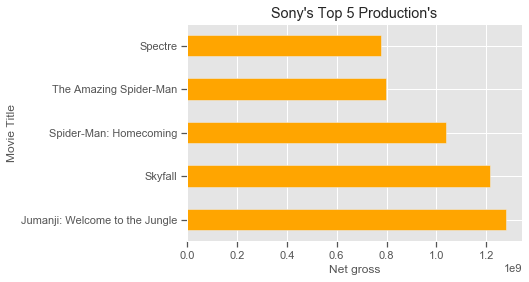

In [98]:
Sony_Top = Sony_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
Sony_Top.head().plot.barh(color= 'orange')
plt.title("Sony's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

In [99]:
Sony = Sony_Top.head(25)
type(Sony)

pandas.core.series.Series

In [100]:
Sy = Sony.to_frame()
Sy.keys

<bound method NDFrame.keys of                                            profit
title                                            
Jumanji: Welcome to the Jungle         1279005109
Skyfall                                1214887258
Spider-Man: Homecoming                 1039367490
The Amazing Spider-Man                  799920930
Spectre                                 779695098
The Amazing Spider-Man 2                711850269
The Karate Kid                          661997672
Hotel Transylvania 3: Summer Vacation   629580054
The Smurfs                              596363481
Hotel Transylvania 2                    559200408
22 Jump Street                          473053213
Hotel Transylvania                      441818860
Peter Rabbit                            412370570
The Angry Birds Movie                   386837253
American Hustle                         367996101
Grown Ups                               359224616
Cloudy with a Chance of Meatballs 2     316186216
The Smurfs 2        

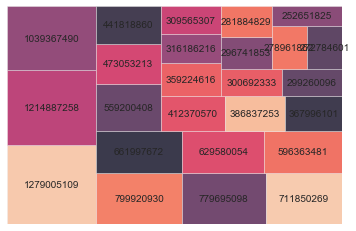

In [101]:
squarify.plot(sizes=Sy.profit, label=Sy.profit, alpha=.8 )
plt.axis('off')
plt.show()

#### WB studio ####

Text(0, 0.5, 'Movie Title')

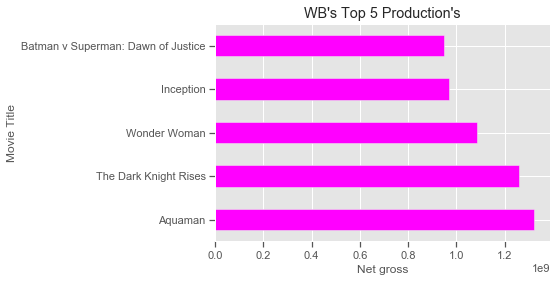

In [102]:
WB_Top = WB_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
WB_Top.head().plot.barh(color= 'magenta')
plt.title("WB's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

#### Buena Vista studio ####

Text(0, 0.5, 'Movie Title')

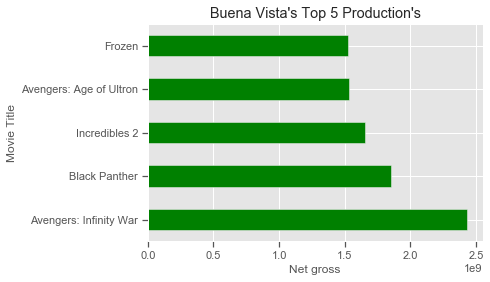

In [103]:
BV_Top = BV_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
BV_Top.head().plot.barh(color = 'green')
plt.title("Buena Vista's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

#### Paramount studio ####

Text(0, 0.5, 'Movie Title')

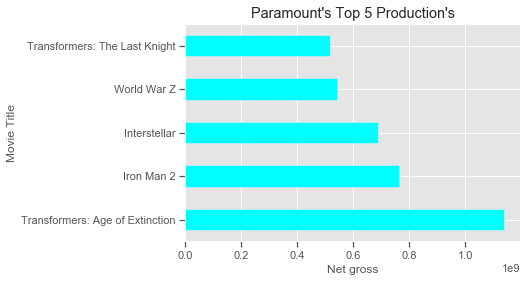

In [104]:
Par_Top = Par_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
Par_Top.head().plot.barh(color= 'cyan')
plt.title("Paramount's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

#### Dream Works studio ####

Text(0, 0.5, 'Movie Title')

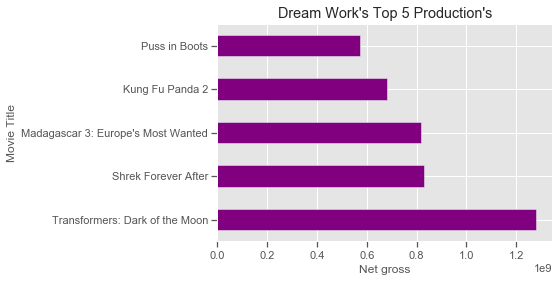

In [105]:
Dream_Works_Top = Dream_Works_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
Dream_Works_Top.head().plot.barh(color= 'purple')
plt.title("Dream Work's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

#### How voting average and popularity play a roll in a studios success? ####

In [106]:
"""the vote counts and popularity are very much similiar seeing as how these are 
the top budgeted movies in production where the vast amount of monies being generated
are solely from franchise films which have an unsurmountable following. """

'the vote counts and popularity are very much similiar seeing as how these are \nthe top budgeted movies in production where the vast amount of monies being generated\nare solely from franchise films which have an unsurmountable following. '

In [107]:
# simple merge for popularity and vote count comparison 
tmdb_bom_merge = pd.merge(bom_movie_gross, tmdb_movies, on = 'title')

Text(0.5, 0, 'Studio')

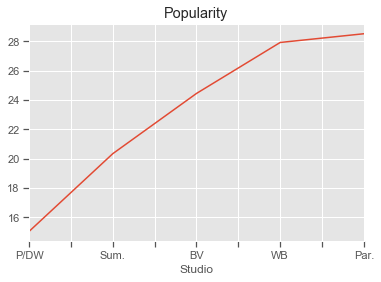

In [185]:
pop = tmdb_bom_merge.head().groupby('studio')['popularity'].agg('sum').sort_values(ascending= True)
pop.plot()
plt.title("Popularity")
plt.style.use('ggplot')
plt.xlabel('Studio')

Text(0.5, 0, 'Studio')

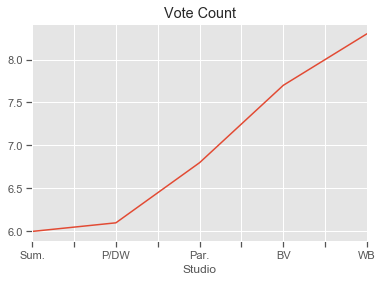

In [109]:
vote_avg = tmdb_bom_merge.head().groupby('studio')['vote_average'].agg('sum').sort_values(ascending= True)
vote_avg.plot()
plt.title("Vote Count")
plt.style.use('ggplot')
plt.xlabel('Studio')

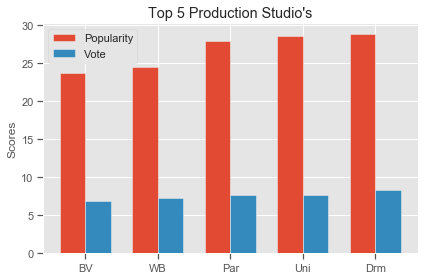

In [110]:
# top 5 studio bar graph net
# top 5 studio popularity 
# top 5 vote avg 
labels = ['BV', 'WB', 'Par', 'Uni', 'Drm']
vote = [6.8, 7.2, 7.7, 7.7, 8.3]
pop = [23.673, 24.445, 27.92 , 28.515, 28.734]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, pop, width, label = 'Popularity')
ax.bar(x + width/2, vote, width, label = 'Vote')
#ax.bar(x - width/2, pop, width, label ='Popularity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title("Top 5 Production Studio's")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

#### Recommendations ####

    1. Based on my dataset I came up with a recommendation that one would have to either outright buy a studio or find an original script that can be nurtured into a franchise and do as Hollywood does, rinse and repeat, at least for all the successful box office films.
    
    2. All of the top studio's are married to their franchises and a large percentage of their box office receipts shows this in their bottom line. Many of these studios are defined by their subsequent franchises. 

#### End Thank You ####